In [49]:
from umap import UMAP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
data_dir = "/home/sdl/SDL-LNP/model/evaluation/notebooks/"

pred_res_path = data_dir + "test_result.csv"
embeddings_path = data_dir + "test_result_representation.npz"

pred_res = pd.read_csv(pred_res_path)
with np.load(embeddings_path) as data:
    embeddings = data["arr_0"]

In [51]:
pred_res

,smi_name,pred_result
0,CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...,0.365110
1,CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...,0.365110
2,CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...,0.295726
3,CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...,0.292340
4,CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...,0.276181
...,...,...
1216507,C#CCCCCCCCCC(=O)N(CCN(CC)CC)C(CCCCCOC(=O)C(CCC...,5.284258
1216508,C#CCCCCCCCCC(=O)N(CCN(CC)CC)C(CCCCCOC(=O)C(CCC...,3.562433
1216509,C#CCCCCCCCCC(=O)N(CCN(CC)CC)C(CCCCCOC(=O)C(CCC...,6.039456
1216510,C#CCCCCCCCCC(=O)N(CCN(CC)CC)C(CCCCCOC(=O)C(CCC...,5.814099


In [52]:
MAPPING_PATH = "/home/sdl/SDL-LNP/model/data_process/220k_library.csv"
mapping_df = pd.read_csv(MAPPING_PATH)
NAME_SMI_PATH = "/home/sdl/SDL-LNP/mapping_table/General_mapping_sampler.csv"
name_smi_df = pd.read_csv(NAME_SMI_PATH)

In [53]:
mean_pred_res = pred_res.groupby("smi_name").mean()
# get mean embedding with same smi_name
smi_names = pred_res["smi_name"].unique()
embeddings_df = pd.DataFrame(embeddings, index=pred_res["smi_name"])
# mean_embeddings = embeddings_df.groupby("smi_name").mean()

# get first embedding with same smi_name
mean_embeddings = embeddings_df.groupby("smi_name").first()

# get last embedding with same smi_name
# mean_embeddings = embeddings_df.groupby("smi_name").last()


# get first 10 embedding with same smi_name
# mean_embeddings = embeddings_df.groupby("smi_name").head(5).groupby("smi_name").mean()


In [54]:
# run pca on mean_embeddings
from sklearn.decomposition import PCA
# pca = PCA(n_components=16)
# mean_embedding_index = mean_embeddings.index
# mean_embeddings = pca.fit_transform(mean_embeddings)
# mean_embeddings = pd.DataFrame(mean_embeddings, index=mean_embedding_index)

In [55]:
# concat df and mapping_df by pairing smi_name with combined_mol_SMILES
df = pd.merge(mapping_df, mean_pred_res,
                     left_on='combined_mol_SMILES', right_on='smi_name', how='inner')
# conver smiles component back to name
df["A_name"] = df["A_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])
df["B_name"] = df["B_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])
df["C_name"] = df["C_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])
df["D_name"] = df["D_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])

In [56]:
mean_pred_res

,pred_result
smi_name,
C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.751226
C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)CC(C)(C)C)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.590973
C#CCCCCCCCCC(=O)N(C(C(=O)NC)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.897558
C#CCCCCCCCCC(=O)N(C(C(=O)NC12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.277665
C#CCCCCCCCCC(=O)N(C(C(=O)NC1CCCC1)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.996465
...,...
CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=O)C(CCCC)CCCCCC)C(=O)NCS(=O)(=O)c1ccc(C)cc1,1.951735
CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=O)C(CCCC)CCCCCC)C(=O)NCn1nnc2ccccc21,2.855164
CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=O)C(CCCCCC)CCCCCCCC)C(=O)NC,1.915895


In [57]:
# sort df by index order in mean_embeddings
df.set_index("combined_mol_SMILES", inplace=True)
df = df.loc[mean_embeddings.index]

In [58]:
N = len(mean_embeddings)
# Initialize and fit UMAP
umap = UMAP(n_components=2)
embeddings_umap = umap.fit_transform(mean_embeddings[:N])


In [59]:
mean_embeddings

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
smi_name,,,,,,,,,,,,,,,,,,,,,
C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.021881,0.070618,0.024628,-0.031281,0.051270,0.056671,0.031555,-0.007317,0.012856,-0.069580,...,-0.010895,0.018570,-0.020020,-0.073975,-0.018951,-0.000857,0.075562,-0.021881,-0.006744,0.109314
C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)CC(C)(C)C)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.004093,0.045197,-0.019119,-0.043579,0.046844,0.054657,0.036926,0.025208,0.000962,-0.069946,...,0.029663,0.004074,-0.056335,-0.063721,0.004002,-0.008667,0.081543,0.003971,0.012444,0.082092
C#CCCCCCCCCC(=O)N(C(C(=O)NC)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.024078,0.015236,-0.034027,-0.031174,0.032074,0.065002,0.035858,0.011528,0.004082,-0.060181,...,-0.011612,0.005394,-0.026962,-0.061768,-0.000193,-0.023071,0.078857,-0.035187,0.002163,0.101135
C#CCCCCCCCCC(=O)N(C(C(=O)NC12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.020996,0.042389,-0.024948,-0.027222,0.030853,0.040588,0.049286,0.018524,-0.003115,-0.054626,...,0.019791,-0.018463,-0.046082,-0.067200,-0.008980,-0.015961,0.090454,-0.036407,-0.015137,0.091797
C#CCCCCCCCCC(=O)N(C(C(=O)NC1CCCC1)C(CCCCCC)CCCCCCCC)N1CCOCC1,0.011452,0.016586,-0.028900,-0.038269,0.034241,0.023178,0.039337,0.038147,0.023056,-0.036041,...,-0.003838,0.003166,-0.036194,-0.091797,-0.005795,-0.006123,0.071350,-0.022034,-0.003004,0.099060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=O)C(CCCC)CCCCCC)C(=O)NCS(=O)(=O)c1ccc(C)cc1,0.020401,0.014641,-0.021973,-0.013275,0.050323,0.037262,0.020279,0.056763,0.008347,-0.050110,...,0.029861,0.008514,-0.045959,-0.076782,0.001340,-0.005886,0.052063,0.010475,-0.017853,0.097595
CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=O)C(CCCC)CCCCCC)C(=O)NCn1nnc2ccccc21,0.018661,-0.004425,0.005249,-0.007763,0.064941,0.018021,-0.017105,0.073914,-0.005798,-0.039337,...,0.058807,-0.006008,-0.068665,-0.050690,-0.029312,-0.008842,0.035645,0.035767,-0.051819,0.091492
CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=O)C(CCCCCC)CCCCCCCC)C(=O)NC,0.018982,0.024521,-0.031174,-0.006622,0.049011,0.026611,-0.011581,0.076111,-0.043884,-0.036682,...,0.040833,-0.016312,-0.055756,-0.044922,-0.011261,0.007122,0.062378,0.015701,-0.024902,0.065674


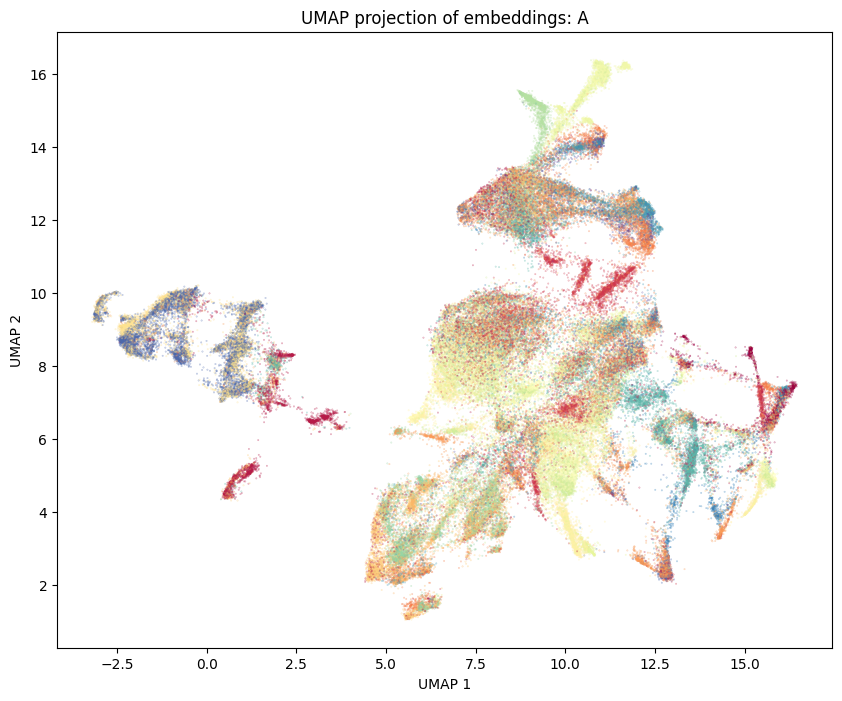

In [60]:
# Plot the UMAP result
plt.figure(figsize=(10, 8))
coloring = df["A_name"].values[:N]
# convert string to int for coloring
coloring = pd.Categorical(coloring).codes
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=0.1, cmap='Spectral', c=coloring, alpha=0.5,)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP projection of embeddings: A')
plt.show()

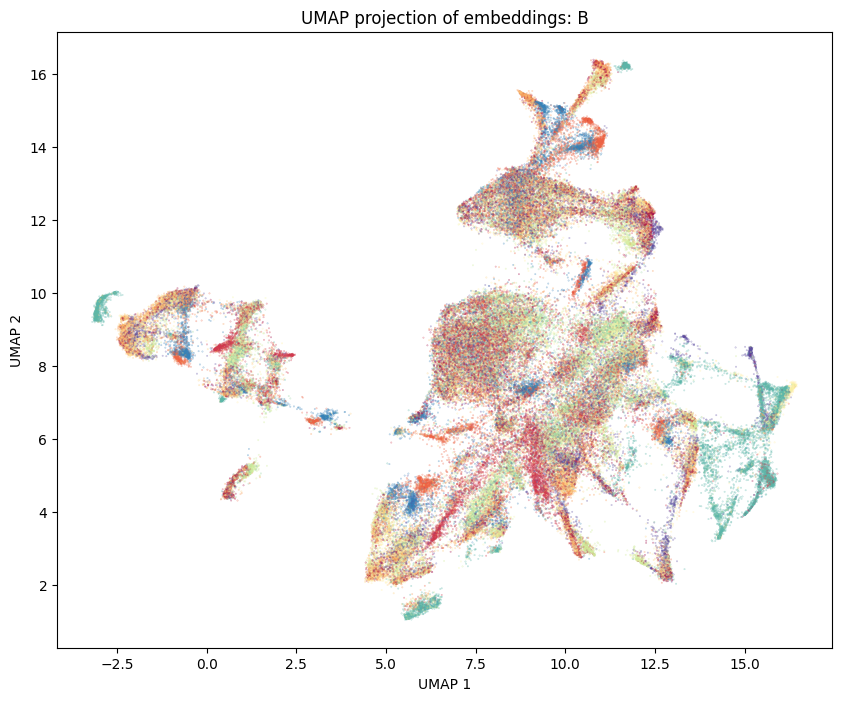

In [61]:
# Plot the UMAP result
plt.figure(figsize=(10, 8))
coloring = df["B_name"].values[:N]
# convert string to int for coloring
coloring = pd.Categorical(coloring).codes
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=0.1, cmap='Spectral', c=coloring, alpha=0.5,)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP projection of embeddings: B')
plt.show()

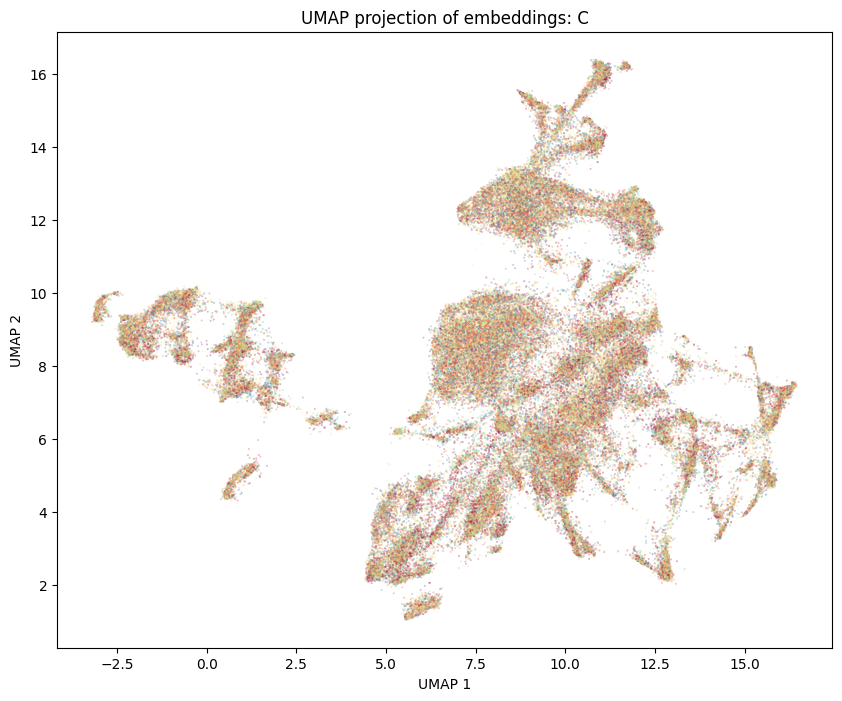

In [62]:
# Plot the UMAP result
plt.figure(figsize=(10, 8))
coloring = df["C_name"].values[:N]
# convert string to int for coloring
coloring = pd.Categorical(coloring).codes
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=0.1, cmap='Spectral', c=coloring, alpha=0.5,)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP projection of embeddings: C')
plt.show()

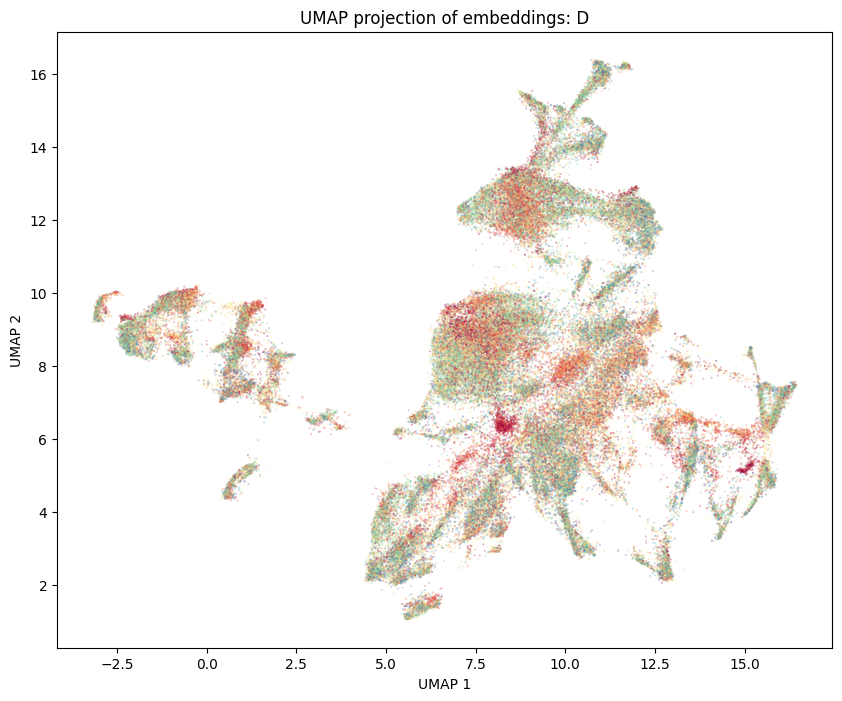

In [63]:
# Plot the UMAP result
plt.figure(figsize=(10, 8))
coloring = df["D_name"].values[:N]
# convert string to int for coloring
coloring = pd.Categorical(coloring).codes
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=0.1, cmap='Spectral', c=coloring, alpha=0.5,)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP projection of embeddings: D')
plt.show()

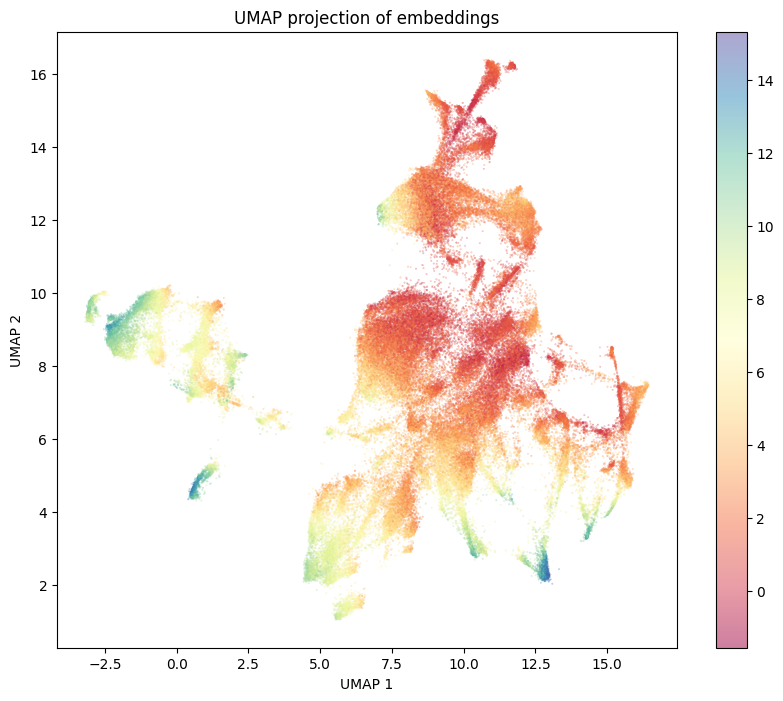

In [64]:
# Plot the UMAP result
plt.figure(figsize=(10, 8))
coloring = df["pred_result"].values[:N]
# convert string to int for coloring
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=0.1, cmap='Spectral', c=coloring, alpha=0.5,
            )
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP projection of embeddings')
# show legend with unique values
plt.colorbar()

plt.show()